# **Problem Question Solution for Battle of Insights Workshops**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_excel("C:\\Users\\sajan\\Desktop\\Dataset & Problem Question for Battle of Insights Workshops\\Data\\transactions.xlsx")
df.head()

,Transaction_ID,Date,Customer_Name,Total_Items,Amount($),Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000667075,2022-09-12 17:40:23,David King,5,30.98,Debit Card,Chicago,Warehouse Club,True,Teenager,Fall,BOGO (Buy One Get One)
1,1000156022,2022-01-20 23:03:20,Michael Williamson,3,23.29,Credit Card,Boston,Warehouse Club,True,Homemaker,Winter,Discount on Selected Items
2,1000681674,2022-10-15 07:49:59,Chelsea Garza,7,25.62,Debit Card,Chicago,Pharmacy,False,Teenager,Fall,Discount on Selected Items
3,1000692089,2024-04-05 09:39:58,Scott Lopez,5,14.64,Mobile Payment,Atlanta,Pharmacy,False,Homemaker,Summer,Discount on Selected Items
4,1000328702,2021-05-28 04:16:54,Crystal Adams,4,62.27,Credit Card,Miami,Convenience Store,False,Retiree,Summer,NaN


In [3]:
df.shape

(38500, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38500 entries, 0 to 38499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     38500 non-null  int64  
 1   Date               38500 non-null  object 
 2   Customer_Name      38500 non-null  object 
 3   Total_Items        38500 non-null  int64  
 4   Amount($)          38500 non-null  float64
 5   Payment_Method     38500 non-null  object 
 6   City               38500 non-null  object 
 7   Store_Type         38500 non-null  object 
 8   Discount_Applied   38500 non-null  bool   
 9   Customer_Category  38500 non-null  object 
 10  Season             38500 non-null  object 
 11  Promotion          25529 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 3.3+ MB


In [5]:
df.isnull().sum()

Transaction_ID           0
Date                     0
Customer_Name            0
Total_Items              0
Amount($)                0
Payment_Method           0
City                     0
Store_Type               0
Discount_Applied         0
Customer_Category        0
Season                   0
Promotion            12971
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Date'].dtypes

dtype('<M8[ns]')

In [8]:
df.columns

Index(['Transaction_ID', 'Date', 'Customer_Name', 'Total_Items', 'Amount($)',
       'Payment_Method', 'City', 'Store_Type', 'Discount_Applied',
       'Customer_Category', 'Season', 'Promotion'],
      dtype='object')

### *Question 1: What is the average transaction amount ($) across different store types, and how does it vary by season?*

In [9]:
# Ensuring the result is a DataFrame, not Series
avg = df.groupby(['Store_Type', 'Season'], as_index = False)['Amount($)'].mean()  

# Rename the column name
avg_transaction = avg.rename(columns = {'Amount($)': 'Average_Amount($)'}, inplace = False)
avg_transaction.head()

,Store_Type,Season,Average_Amount($)
0,Convenience Store,Fall,52.872504
1,Convenience Store,Spring,53.537230
2,Convenience Store,Summer,53.345305
3,Convenience Store,Winter,51.595034
4,Department Store,Fall,51.384757


In [10]:
#Sorting the data
avg_transaction.sort_values('Average_Amount($)', ascending = False).head()

,Store_Type,Season,Average_Amount($)
14,Specialty Store,Summer,53.594788
1,Convenience Store,Spring,53.537230
13,Specialty Store,Spring,53.524048
2,Convenience Store,Summer,53.345305
11,Pharmacy,Winter,53.218725


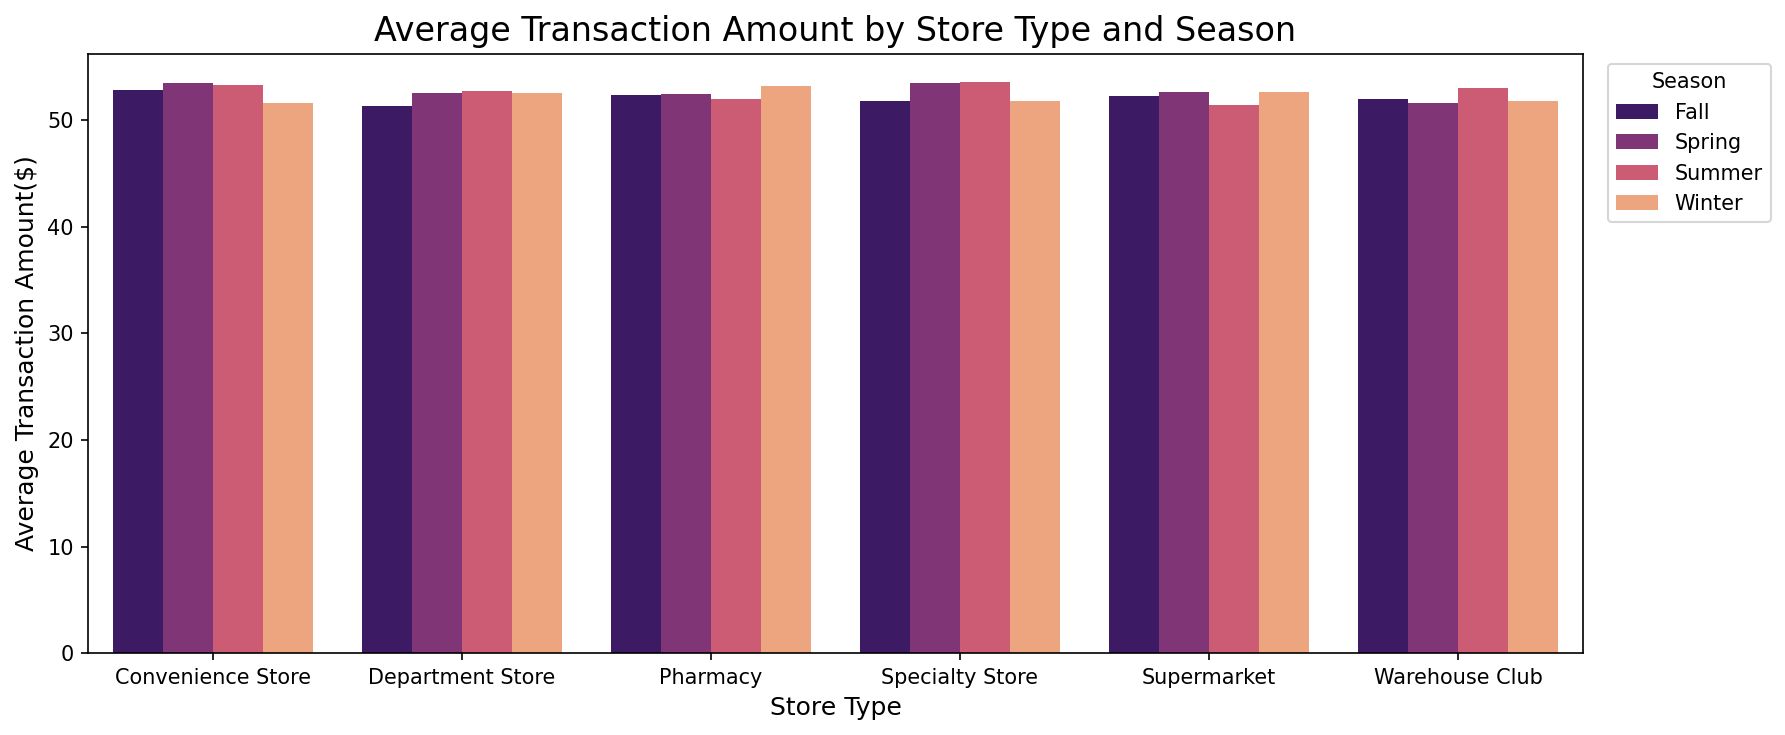

In [124]:
plt.figure(figsize=(12, 5), dpi = 150)
sns.barplot(
    data = avg_transaction,
    x = 'Store_Type',
    y = 'Average_Amount($)',
    hue = 'Season',
    palette = 'magma'
)
plt.title('Average Transaction Amount by Store Type and Season', fontsize = 16)
plt.ylabel('Average Transaction Amount($)', fontsize = 12)
plt.xlabel('Store Type', fontsize = 12)
plt.legend(bbox_to_anchor = (1.01, 1), loc = 'upper left', title = 'Season')
plt.tight_layout()
plt.show()

### *Question 2: Which payment method is most commonly used in high-value transactions (above the average transaction amount), and how does it differ across cities?*

In [12]:
# Identify high-value transactions
high_value_transaction = df[df['Amount($)'] > df['Amount($)'].mean()]
high_value_transaction.head()

,Transaction_ID,Date,Customer_Name,Total_Items,Amount($),Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
4,1000328702,2021-05-28 04:16:54,Crystal Adams,4,62.27,Credit Card,Miami,Convenience Store,False,Retiree,Summer,NaN
6,1000978153,2023-12-15 15:12:14,Walter Peters,7,88.07,Cash,Seattle,Pharmacy,True,Professional,Fall,NaN
7,1000555157,2022-07-06 14:04:28,Kimberly Rosales,9,62.51,Mobile Payment,New York,Warehouse Club,False,Student,Spring,BOGO (Buy One Get One)
11,1000613651,2023-01-25 13:07:22,Derrick Ferguson,3,68.68,Mobile Payment,Dallas,Convenience Store,True,Retiree,Winter,NaN
12,1000675909,2022-11-07 15:39:11,Tara Jones,10,59.65,Debit Card,Miami,Convenience Store,True,Professional,Summer,BOGO (Buy One Get One)


In [13]:
# Count how many high-value transactions occurred for each payment method in each city
common_payment = high_value_transaction.groupby(['City', 'Payment_Method'], as_index = False).size()

# Rename the DataFrame with a new column called 'Count'
common_payment = common_payment.rename(columns = {'size':'Count'})
common_payment.head()

,City,Payment_Method,Count
0,Atlanta,Cash,467
1,Atlanta,Credit Card,452
2,Atlanta,Debit Card,451
3,Atlanta,Mobile Payment,506
4,Boston,Cash,485


In [14]:
# Sorting the data by City and Count in descending order.
common_payment = common_payment.sort_values(['City', 'Count'], ascending = [True, False])
common_payment.head()

,City,Payment_Method,Count
3,Atlanta,Mobile Payment,506
0,Atlanta,Cash,467
1,Atlanta,Credit Card,452
2,Atlanta,Debit Card,451
4,Boston,Cash,485


In [15]:
# Keeping only the highest count per city 
common_payment.drop_duplicates('City')

,City,Payment_Method,Count
3,Atlanta,Mobile Payment,506
4,Boston,Cash,485
8,Chicago,Cash,516
14,Dallas,Debit Card,538
16,Houston,Cash,492
22,Los Angeles,Debit Card,518
25,Miami,Credit Card,489
31,New York,Mobile Payment,510
33,San Francisco,Credit Card,504
38,Seattle,Debit Card,512


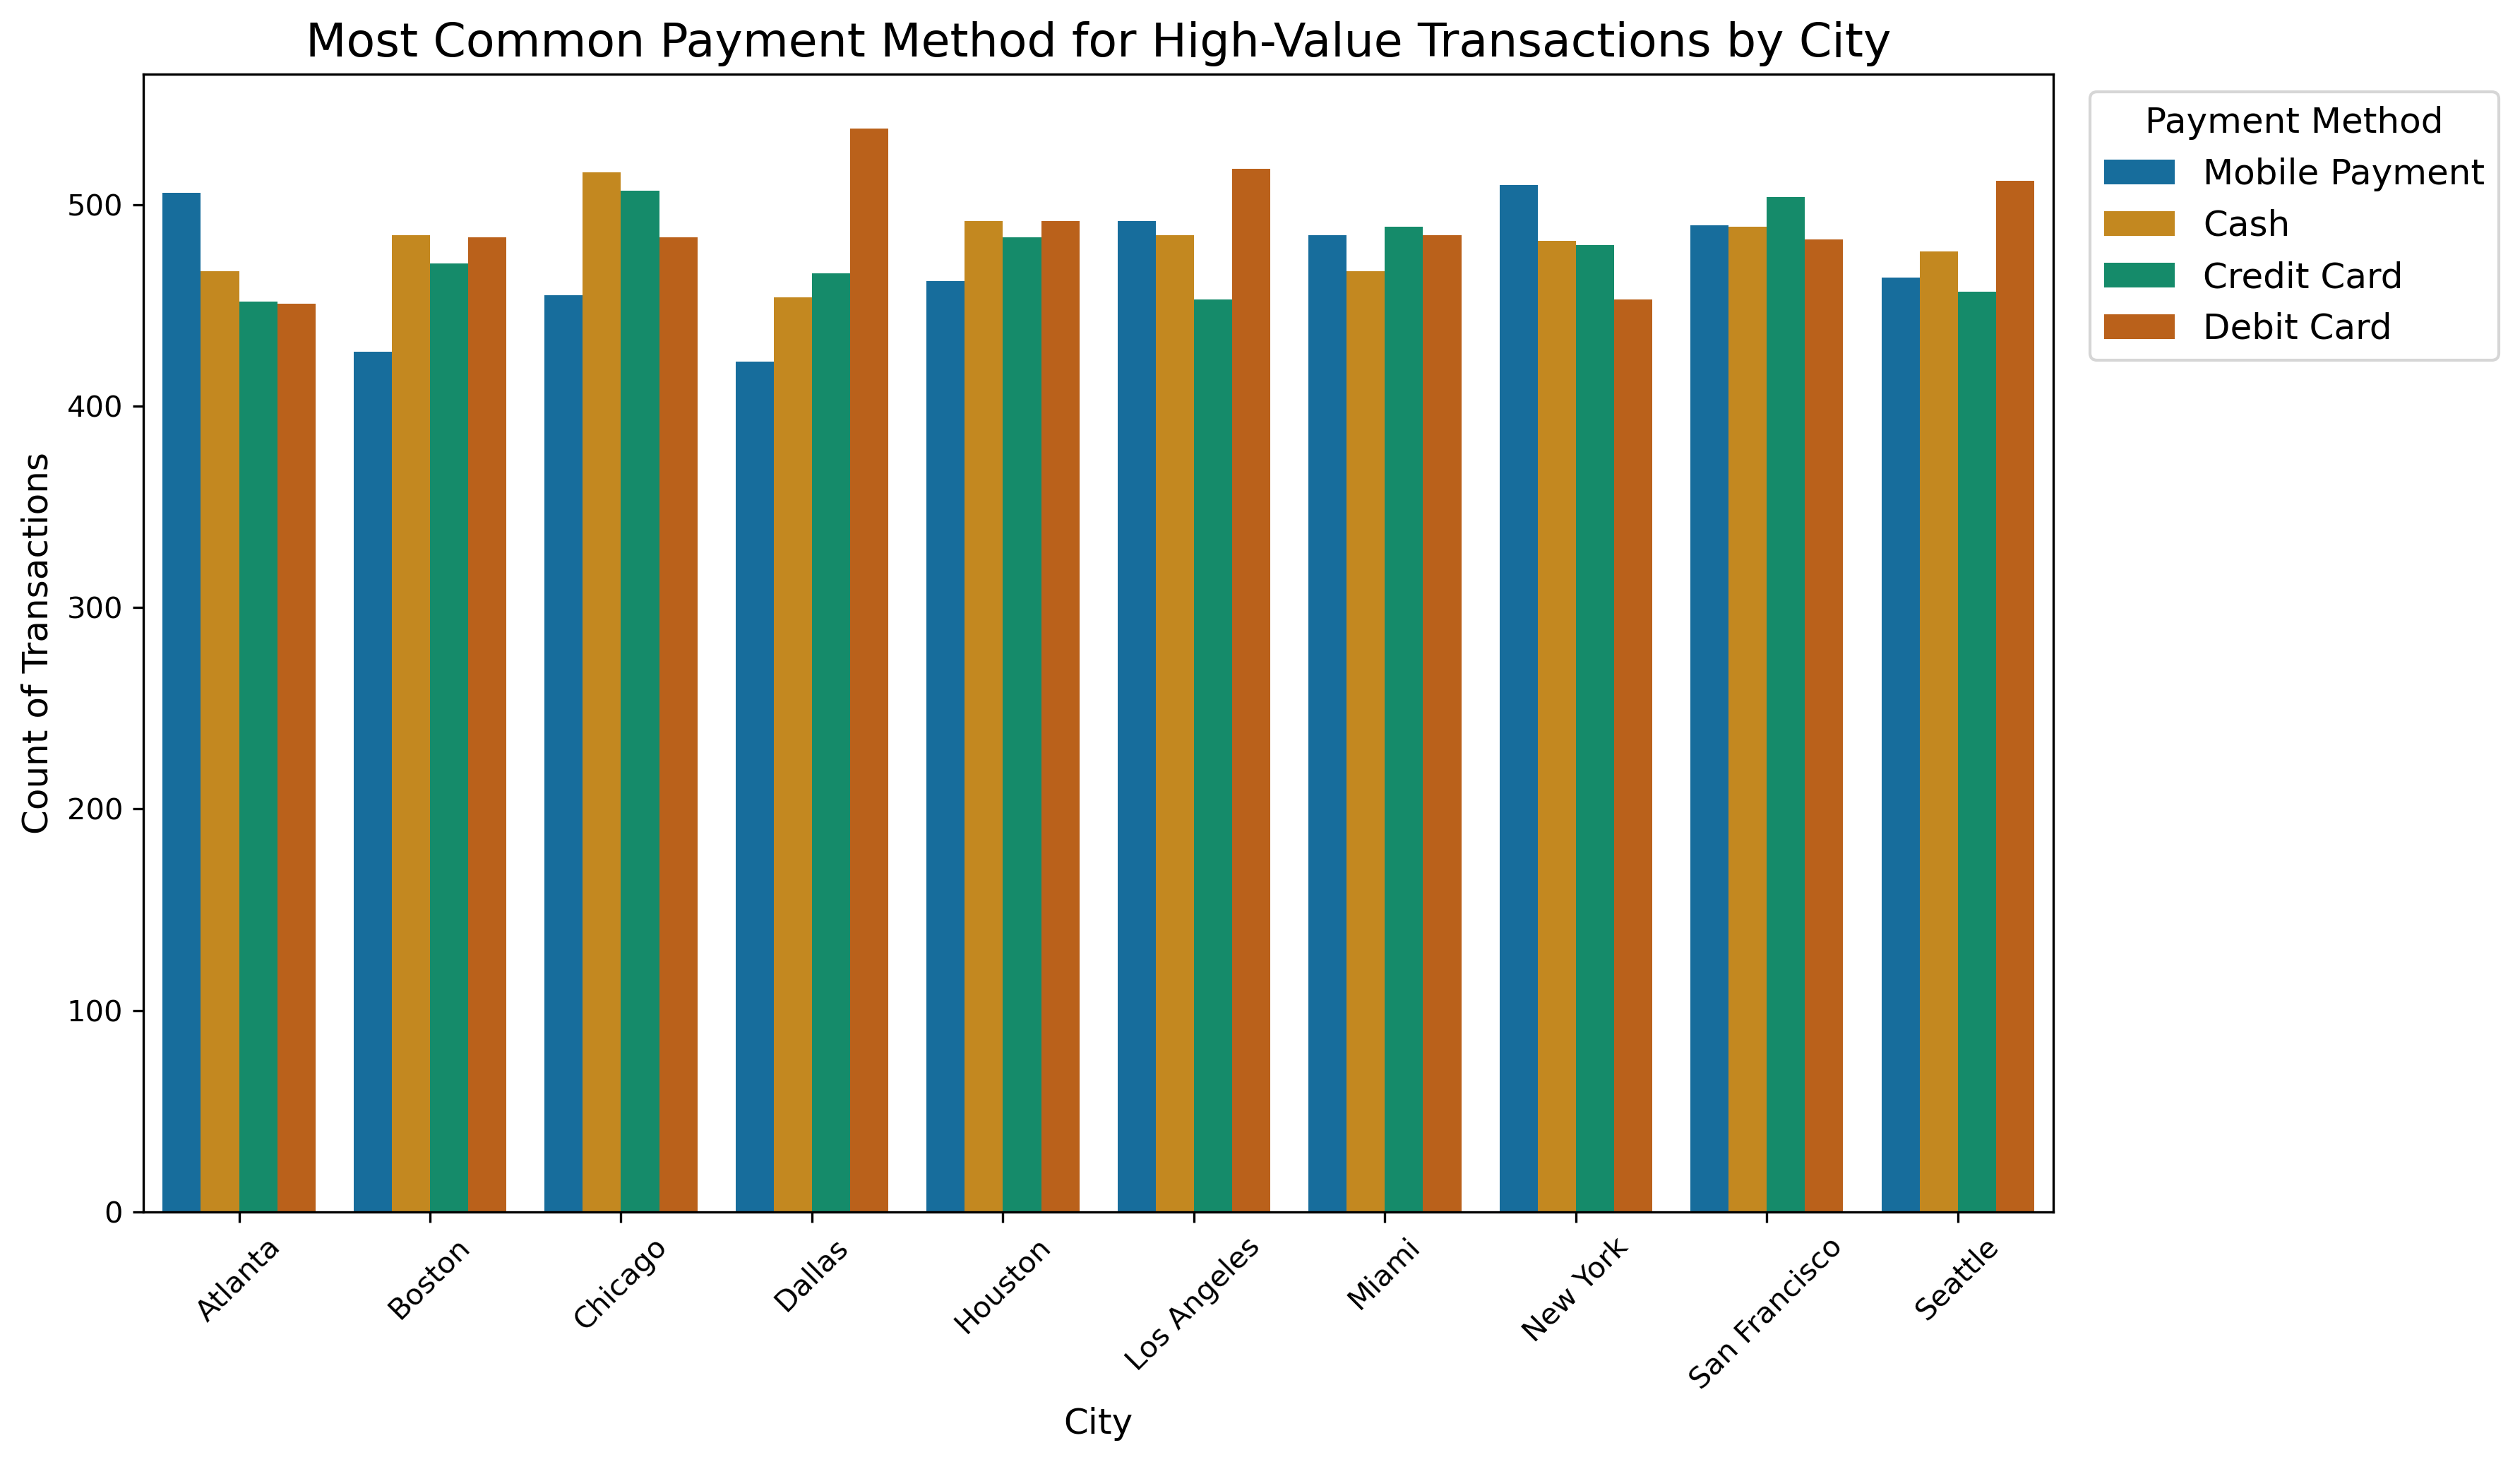

In [130]:
plt.figure(figsize = (12, 7), dpi = 300)
sns.barplot(
    data = common_payment,
    x = 'City',
    y = 'Count',
    hue = 'Payment_Method',
    palette='colorblind'
)
plt.title('Most Common Payment Method for High-Value Transactions by City', fontsize = 16)
plt.ylabel('Count of Transactions', fontsize = 12)
plt.xlabel('City', fontsize = 12)
plt.xticks(rotation=45)
legend = plt.legend(bbox_to_anchor=(1.01, 1), loc = 'upper left', title = 'Payment Method', fontsize = 12)
legend.get_title().set_fontsize(12)
plt.tight_layout()
plt.show()

### *Question 3: How do the sales amounts in transactions with discounts compare to those without discounts, and what trends can be observed over the month?*

In [17]:
# Make a DataFrame for sales with discounts

df['Month'] = df['Date'].dt.strftime('%b %Y')  # Convert to month

sales_with_discounts = (
    df[df['Discount_Applied'] == True]  # Filtering the transactions where discount applied
    .groupby(df['Month'])   # Group by month
    ['Amount($)'].sum()  # sum the amount where discount applied
    .reset_index(name = 'Sales_With_Discounts')   # Convert to a DataFrame and rename the column
)

In [18]:
sales_with_discounts.head()

,Month,Sales_With_Discounts
0,Apr 2020,19544.13
1,Apr 2021,18861.20
2,Apr 2022,18943.77
3,Apr 2023,20897.92
4,Apr 2024,16332.36


In [19]:
# Make a DataFrame for sales without discounts

sales_without_discounts = (
    df[df['Discount_Applied'] == False]  # Filtering the transactions where discount applied
    .groupby(df['Month'])   # Group by month
    ['Amount($)'].sum()  # sum the amount where discount applied
    .reset_index(name = 'Sales_Without_Discounts')   # Convert to a DataFrame and rename the column
)

In [20]:
sales_without_discounts.head()

,Month,Sales_Without_Discounts
0,Apr 2020,18664.89
1,Apr 2021,17887.58
2,Apr 2022,18435.40
3,Apr 2023,18131.72
4,Apr 2024,18378.97


In [21]:
# Merge two DataFrames
comparison_df = pd.merge(sales_with_discounts, sales_without_discounts, on = 'Month')
comparison_df.head()

,Month,Sales_With_Discounts,Sales_Without_Discounts
0,Apr 2020,19544.13,18664.89
1,Apr 2021,18861.20,17887.58
2,Apr 2022,18943.77,18435.40
3,Apr 2023,20897.92,18131.72
4,Apr 2024,16332.36,18378.97


In [22]:
comparison_df['Month'].dtypes

dtype('O')

In [23]:
# Replace infinite values with NaN in the dataframe
comparison_df.replace([np.inf, -np.inf], np.nan, inplace = True)

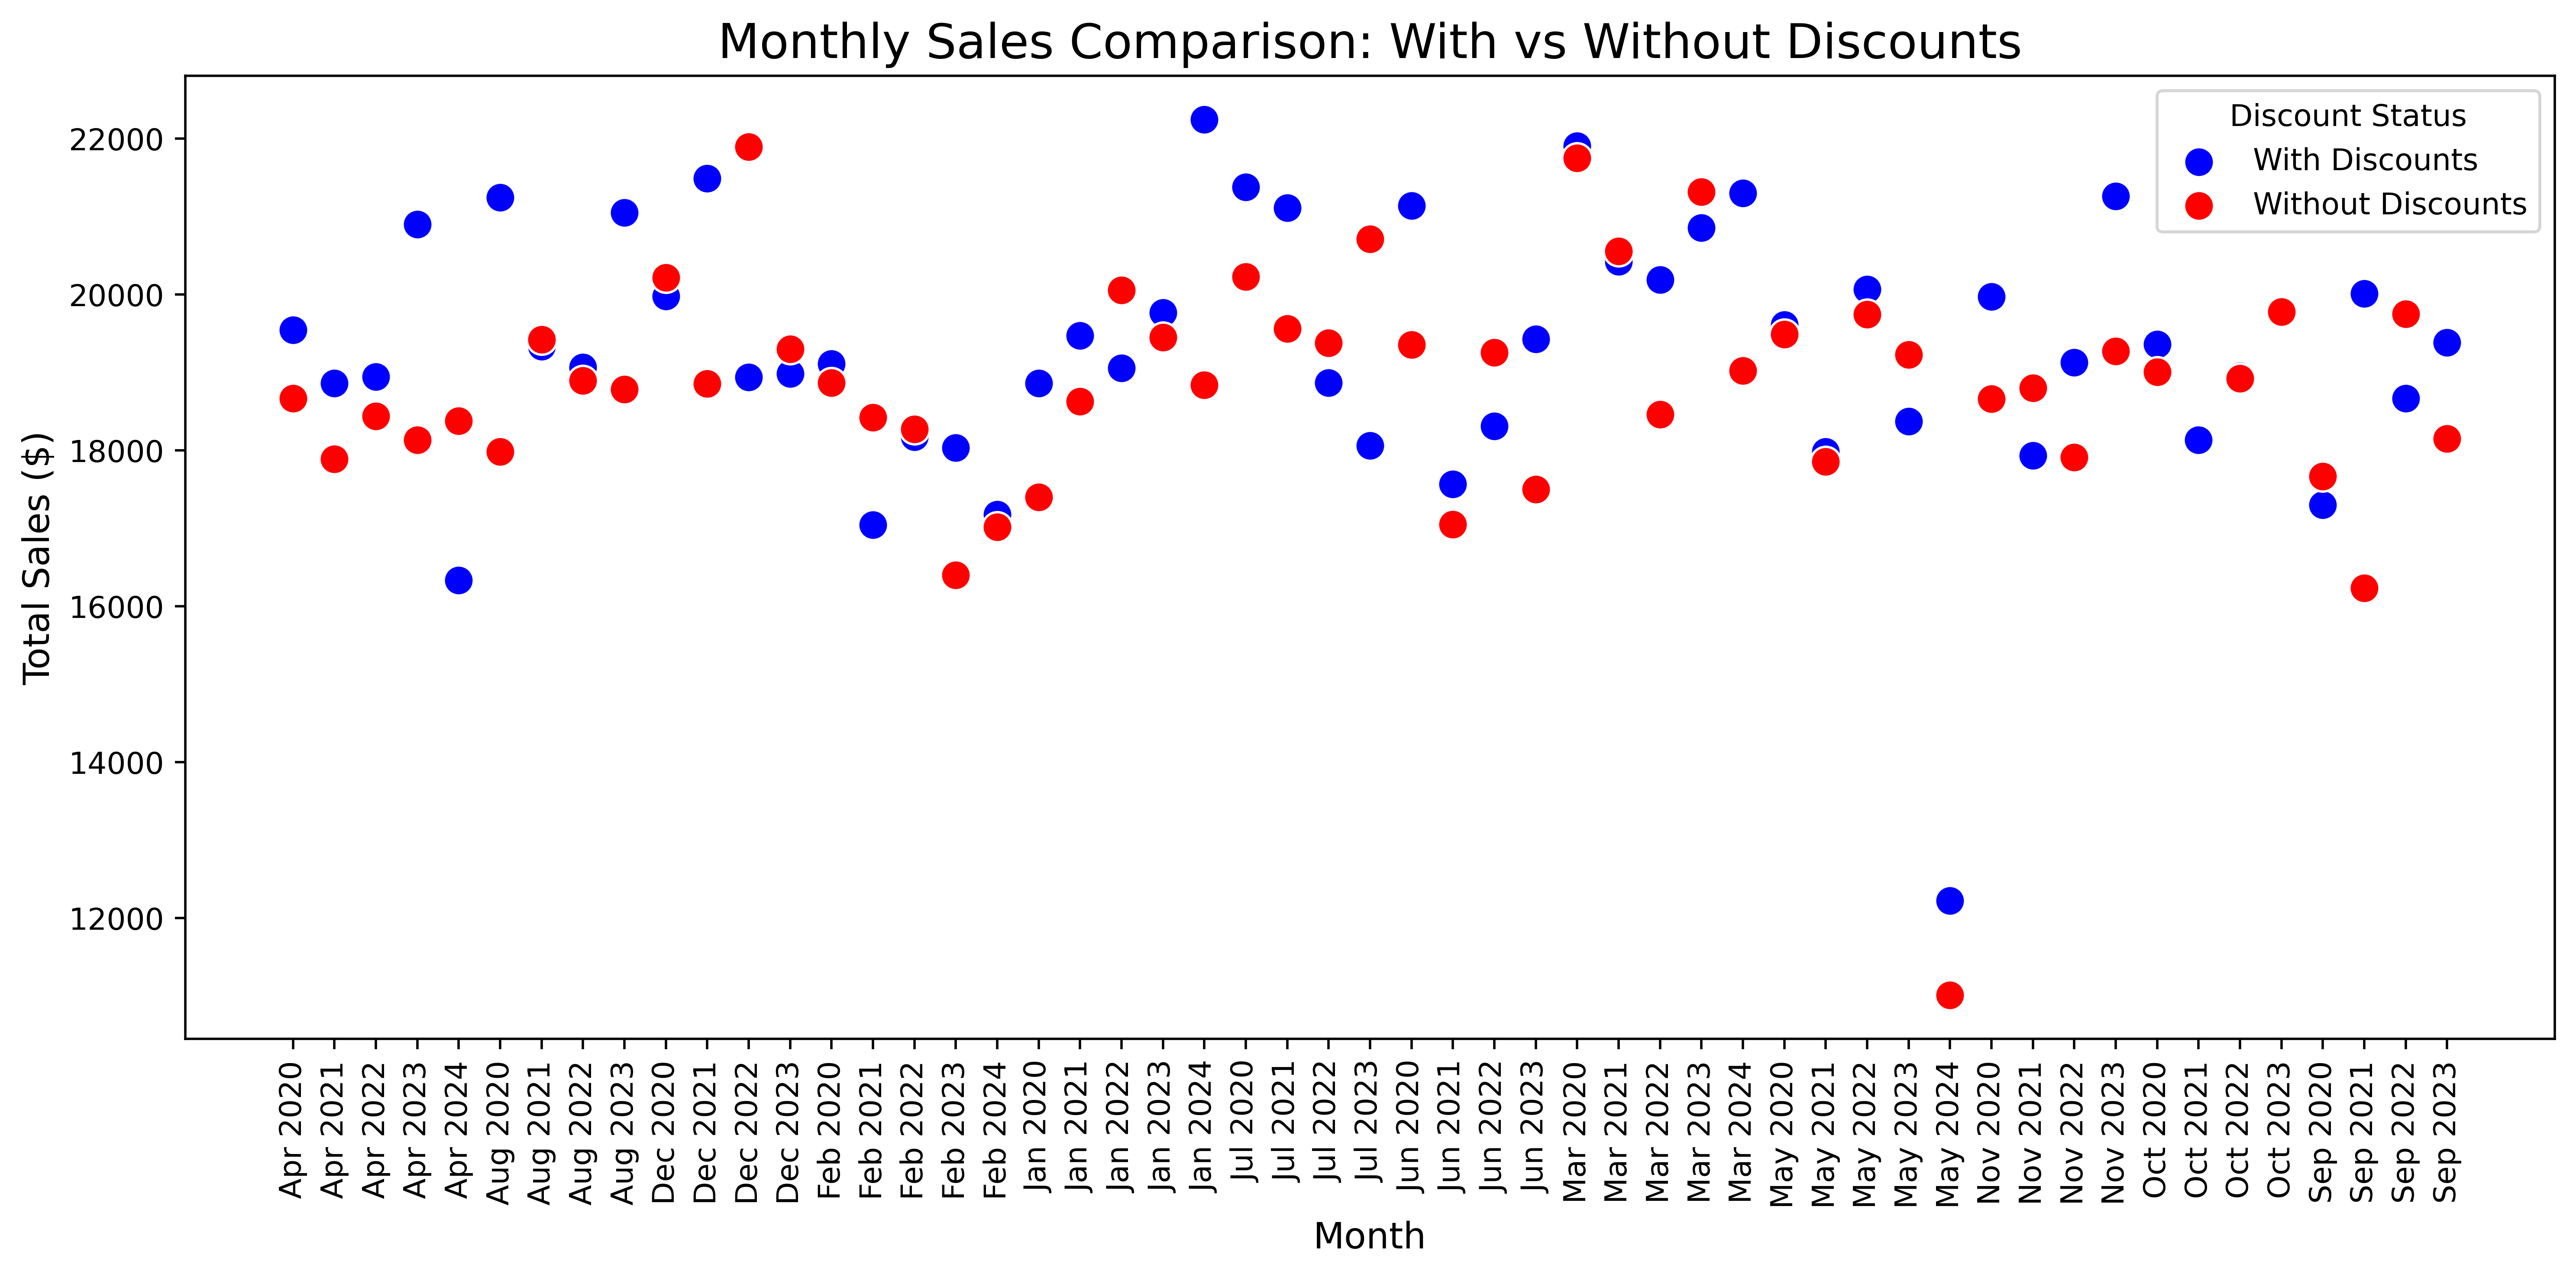

In [155]:
# Scatter Plot
plt.figure(figsize=(12, 6), dpi=500)

# Scatter for sales with discounts
sns.scatterplot(
    data=comparison_df,
    x='Month',
    y='Sales_With_Discounts',
    label='With Discounts',
    color='blue',
    marker='o',
    s=100  # Adjust size of scatter points
)

# Scatter for sales without discounts
sns.scatterplot(
    data=comparison_df,
    x='Month',
    y='Sales_Without_Discounts',
    label='Without Discounts',
    color='red',
    marker='o',
    s=100
)

plt.title('Monthly Sales Comparison: With vs Without Discounts', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Discount Status', loc='upper right')
plt.tight_layout()
plt.show()

C:\Users\sajan\AppData\Local\Temp\ipykernel_18520\553599287.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sajan\AppData\Local\Temp\ipykernel_18520\553599287.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a futur

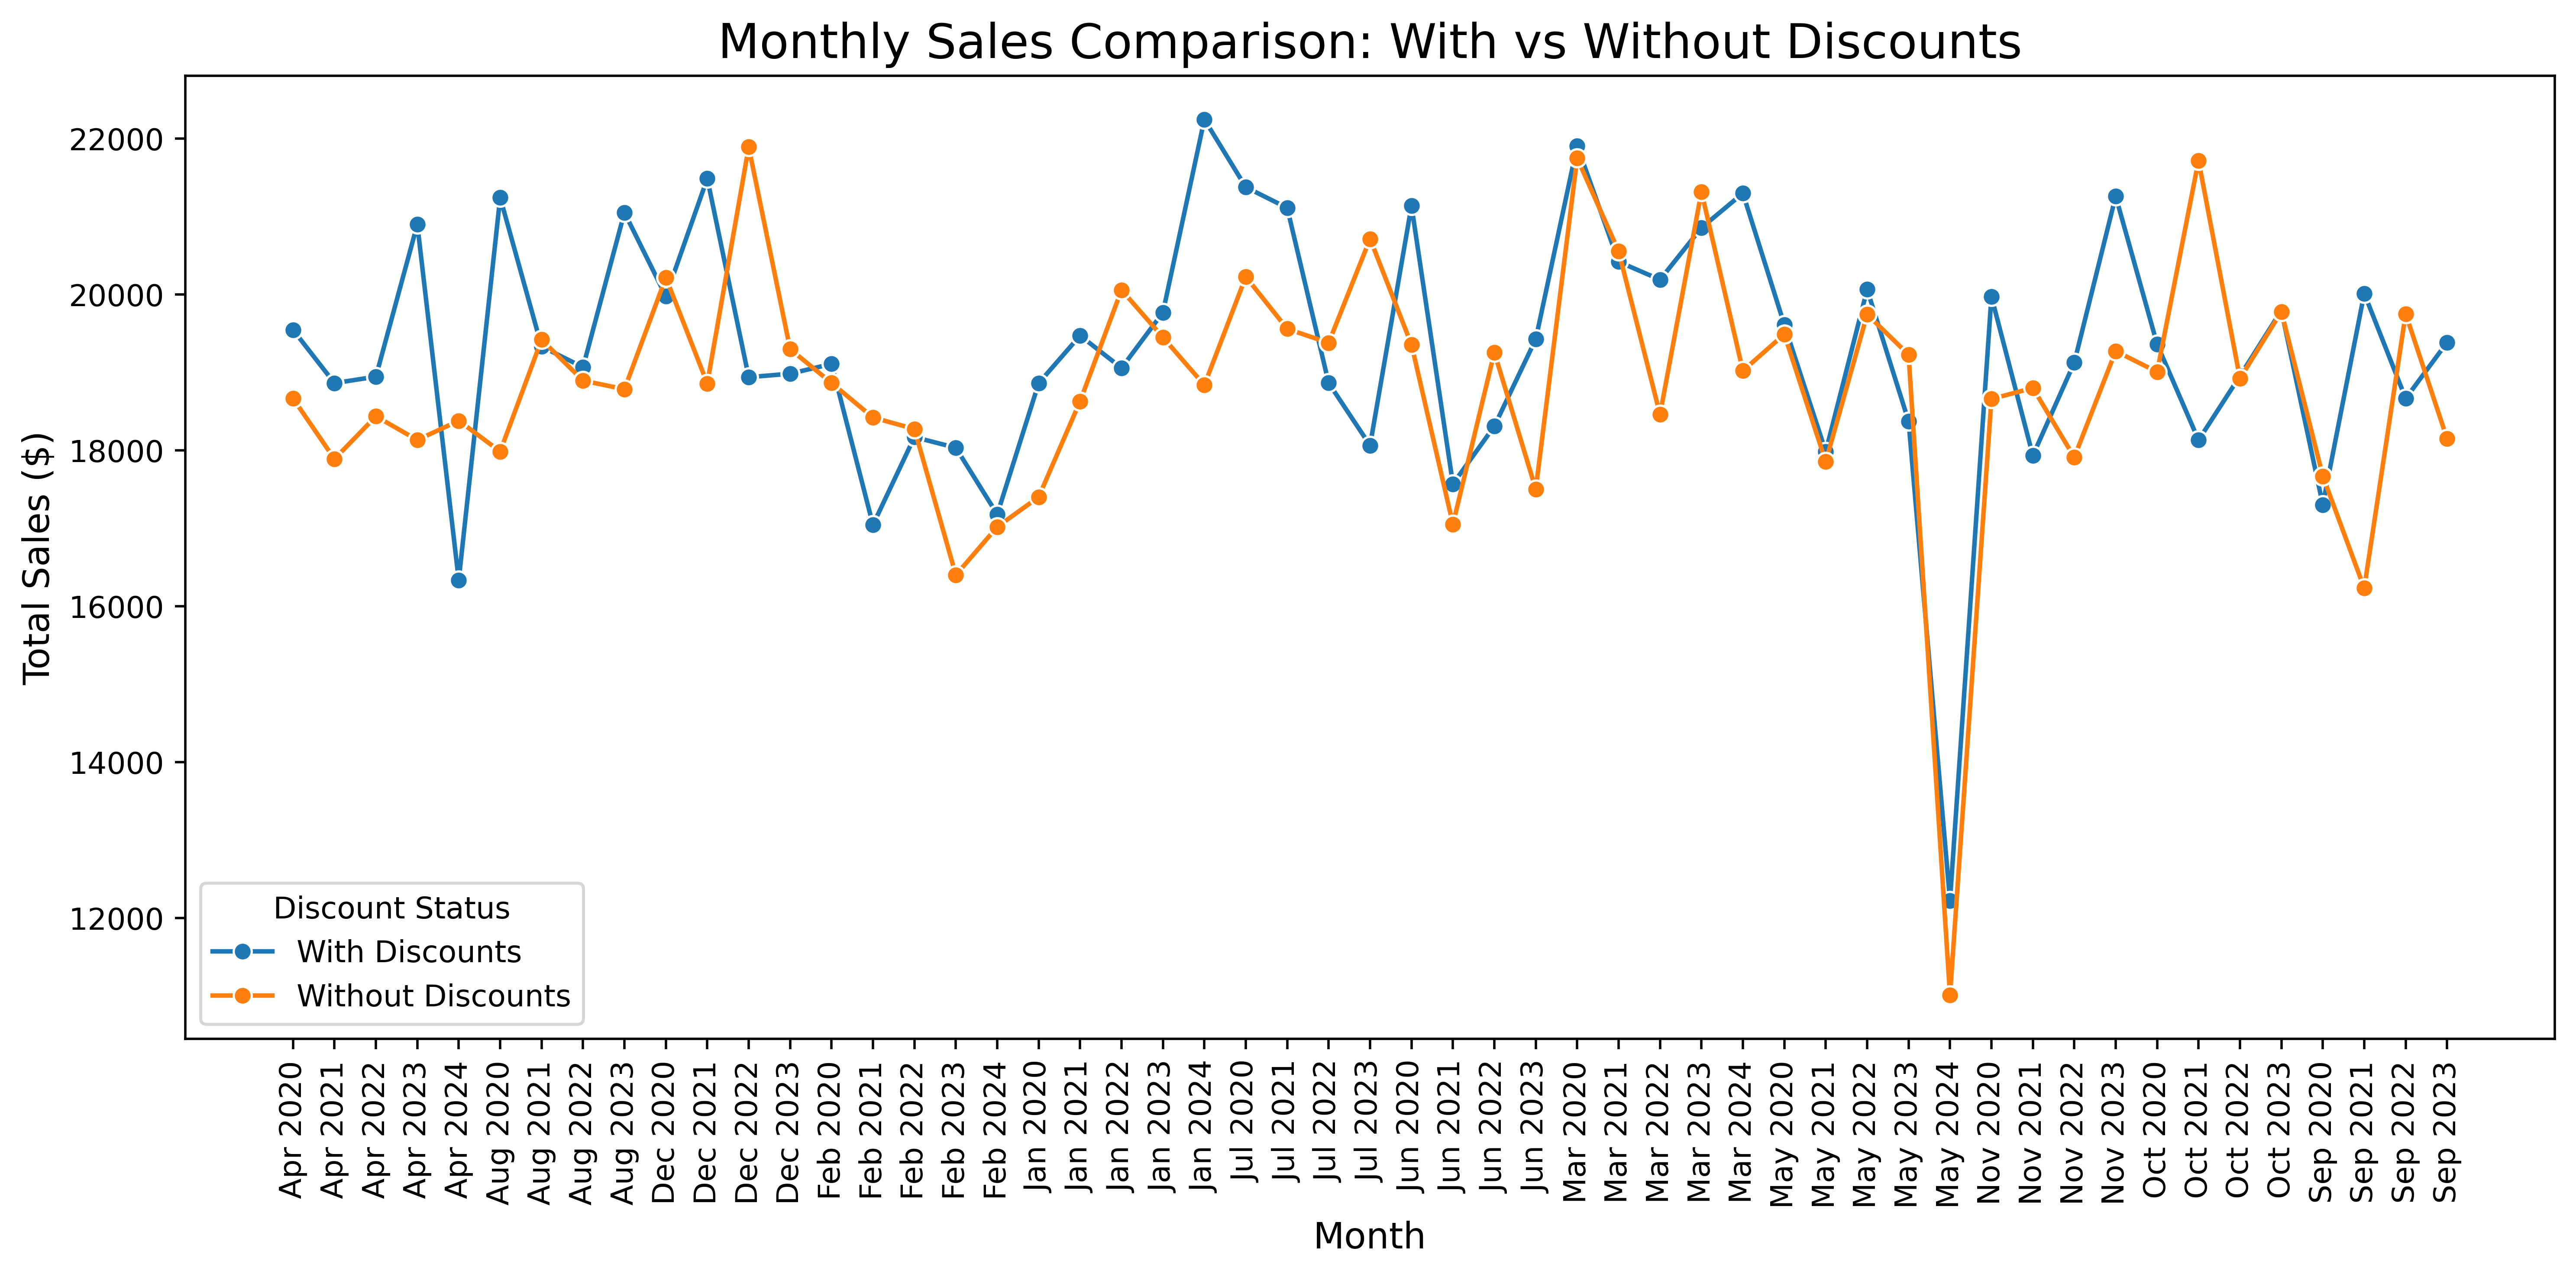

In [154]:
# Line plot
plt.figure(figsize = (12, 6), dpi = 500)

# Line for sales with discounts
sns.lineplot(
    data = comparison_df, 
    x = 'Month', 
    y = 'Sales_With_Discounts', 
    label='With Discounts', 
    marker = 'o', 
    palette = 'BrBG'
)

# Line for sales without discounts
sns.lineplot(
    data = comparison_df,
    x = 'Month',
    y = 'Sales_Without_Discounts',
    label='Without Discounts',
    marker = 'o',
    palette = 'BrBG'
)
plt.title('Monthly Sales Comparison: With vs Without Discounts', fontsize = 16)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Total Sales ($)', fontsize = 12)
plt.xticks(rotation = 90)
plt.legend(title = 'Discount Status')
# plt.grid()
plt.tight_layout()
plt.show()

### *Question 4: What are the top three cities with the highest average number of items per transaction, and how do their sales amounts vary across seasons?*

In [25]:
df.head()

,Transaction_ID,Date,Customer_Name,Total_Items,Amount($),Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Month
0,1000667075,2022-09-12 17:40:23,David King,5,30.98,Debit Card,Chicago,Warehouse Club,True,Teenager,Fall,BOGO (Buy One Get One),Sep 2022
1,1000156022,2022-01-20 23:03:20,Michael Williamson,3,23.29,Credit Card,Boston,Warehouse Club,True,Homemaker,Winter,Discount on Selected Items,Jan 2022
2,1000681674,2022-10-15 07:49:59,Chelsea Garza,7,25.62,Debit Card,Chicago,Pharmacy,False,Teenager,Fall,Discount on Selected Items,Oct 2022
3,1000692089,2024-04-05 09:39:58,Scott Lopez,5,14.64,Mobile Payment,Atlanta,Pharmacy,False,Homemaker,Summer,Discount on Selected Items,Apr 2024
4,1000328702,2021-05-28 04:16:54,Crystal Adams,4,62.27,Credit Card,Miami,Convenience Store,False,Retiree,Summer,NaN,May 2021


In [45]:
# Calculate the average number of items per transaction in each city
avg_items = df.groupby('City')['Total_Items'].mean()

# Finding top 3 cities with the highest average number of items per transaction
top_cities = avg_items.nlargest(3).index

# Filtering the data to include only the top 3 cities
filter_data = df[df['City'].isin(top_cities)]

# Calculate the average sales by city and season
sales_top_cities = filter_data.groupby(['City', 'Season'], as_index = False)['Amount($)'].mean()

In [46]:
sales_top_cities

,City,Season,Amount($)
0,Chicago,Fall,52.331881
1,Chicago,Spring,53.990646
2,Chicago,Summer,53.453493
3,Chicago,Winter,53.090349
4,Houston,Fall,52.965102
5,Houston,Spring,52.215140
6,Houston,Summer,52.245323
7,Houston,Winter,51.126946
8,Miami,Fall,53.052973
9,Miami,Spring,52.636293


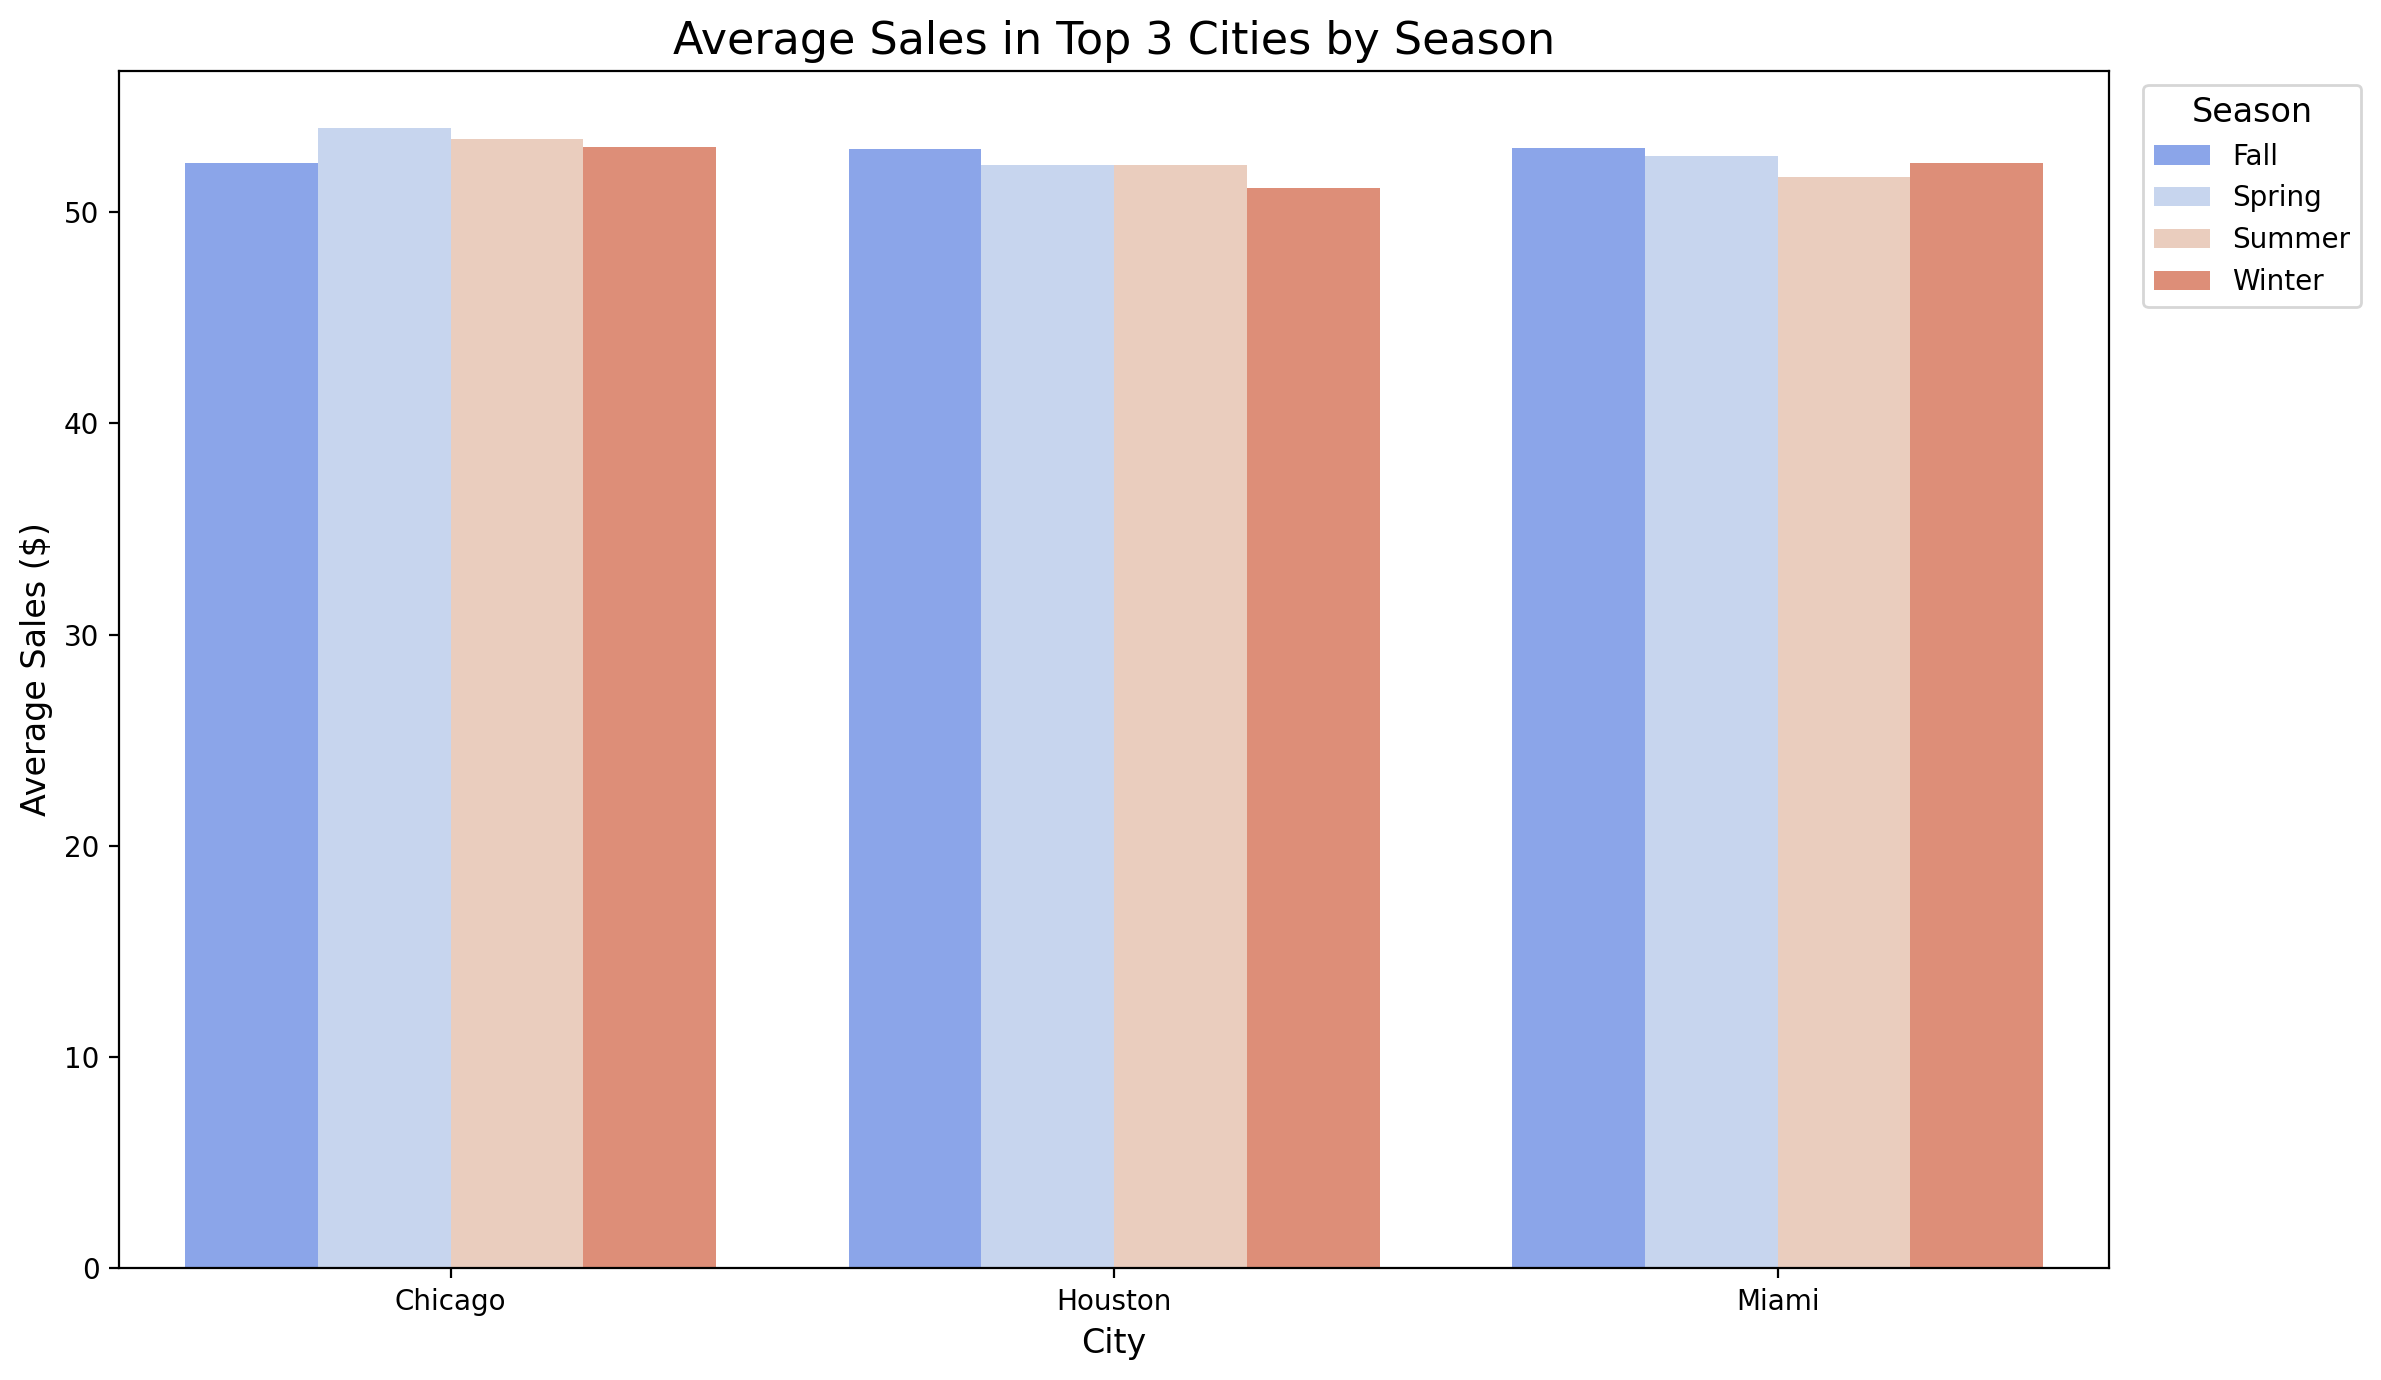

In [159]:
plt.figure(figsize=(12, 7), dpi = 200)
sns.barplot(
    data=sales_top_cities, 
    x='City', 
    y='Amount($)', 
    hue='Season', 
    palette='coolwarm'
)
plt.title('Average Sales in Top 3 Cities by Season', fontsize = 16)
plt.xlabel('City', fontsize = 12)
plt.ylabel('Average Sales ($)', fontsize = 12)
legend = plt.legend(title='Season', bbox_to_anchor=(1.01, 1), loc='upper left')
legend.get_title().set_fontsize(12)
# Show the plot
plt.tight_layout()
plt.show()

### *Question 5: How effective are different promotions in driving higher transaction amounts, and which promotion type performs best in each season?*

In [178]:
# Filter rows with non-NaN promotions
promotion_effect = df[df['Promotion'].notna()] 

# Group data by 'Promotion' and 'Season' and calculate the average amount
promotion_effect = promotion_effect.groupby(['Promotion', 'Season'])['Amount($)'].mean() 

# Reset the index and rename the column
promotion_effect = promotion_effect.reset_index(name = 'Avg_Transaction_Amount')    

# Sorting values by 'Season' and 'Avg_Transaction_Amount'
promotion_effect = promotion_effect.sort_values(['Season', 'Avg_Transaction_Amount'], ascending=[True, False])   

In [179]:
promotion_effect.head()

,Promotion,Season,Avg_Transaction_Amount
0,BOGO (Buy One Get One),Fall,52.678438
4,Discount on Selected Items,Fall,51.997053
5,Discount on Selected Items,Spring,53.177148
1,BOGO (Buy One Get One),Spring,52.519019
2,BOGO (Buy One Get One),Summer,53.271761


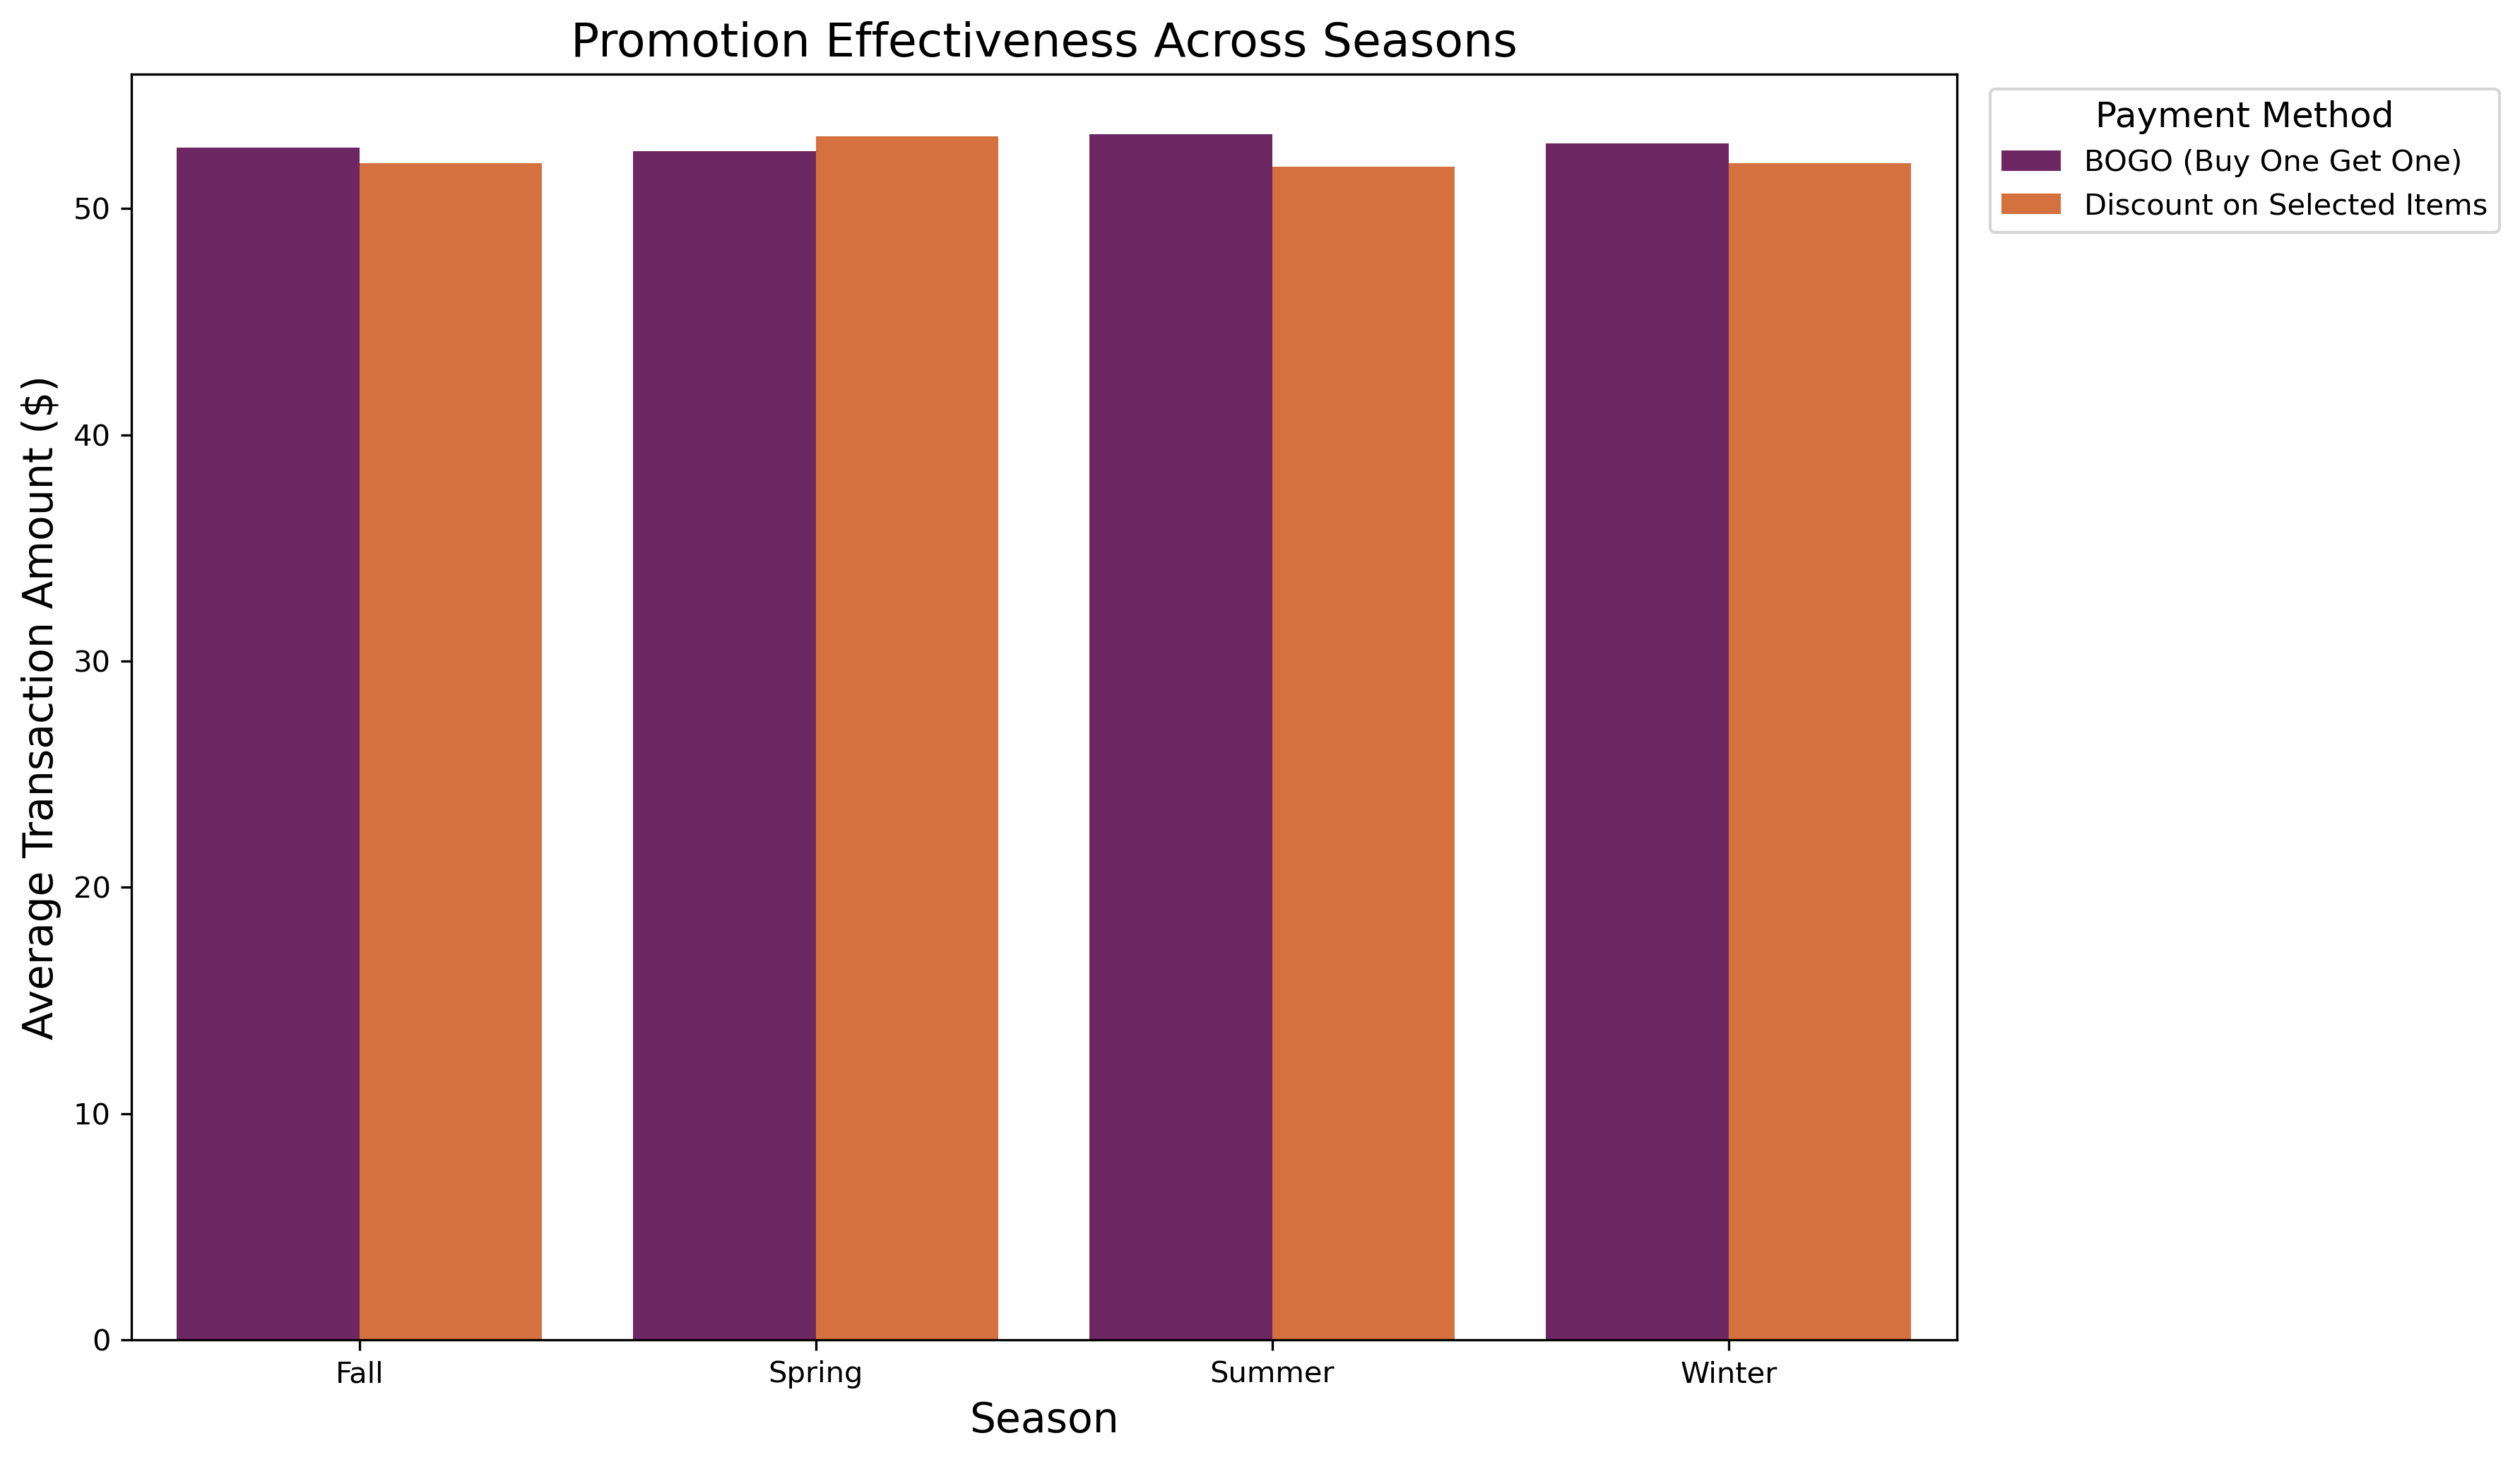

In [182]:
# Bar plot
plt.figure(figsize=(12, 7), dpi = 300)
sns.barplot(
    data=promotion_effect,
    x='Season',
    y='Avg_Transaction_Amount',
    hue='Promotion', 
    palette='inferno'
)
plt.title('Promotion Effectiveness Across Seasons', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Transaction Amount ($)', fontsize=14)
legend=plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='Payment Method', fontsize=10)
legend.get_title().set_fontsize(12)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


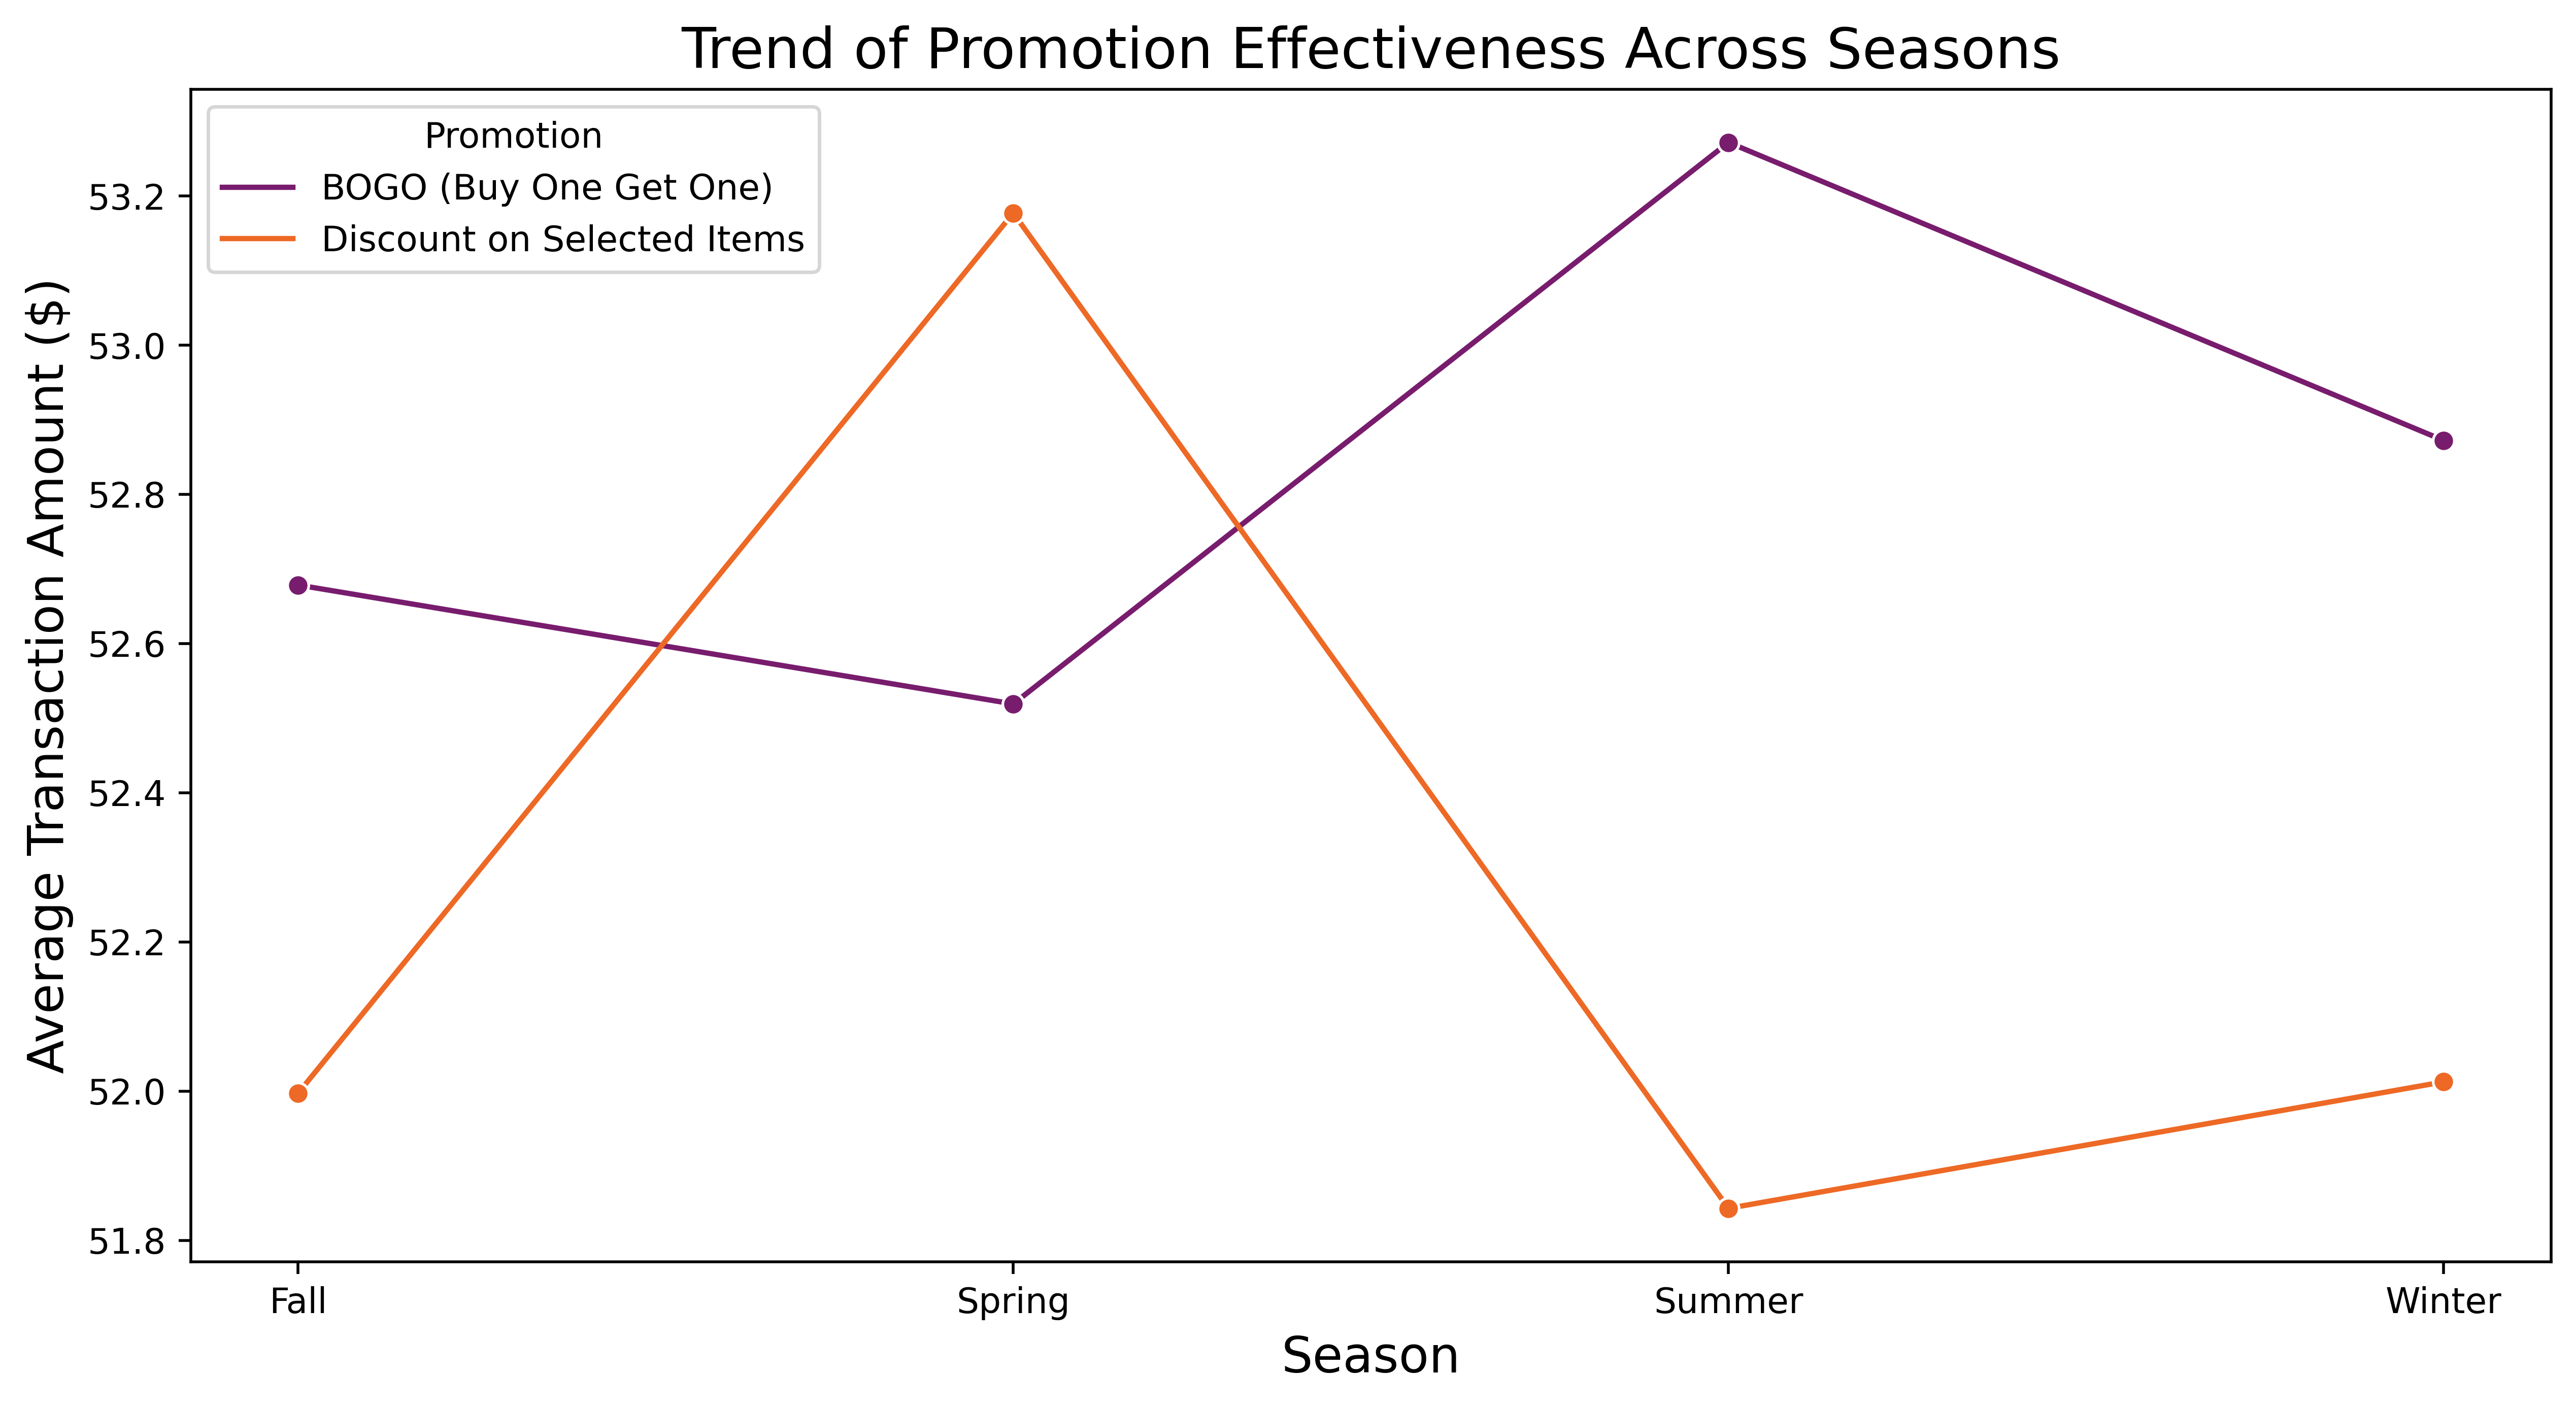

In [183]:
#Line plot
plt.figure(figsize=(12, 6), dpi = 500)
sns.lineplot(
    data=promotion_effect,
    x='Season',
    y='Avg_Transaction_Amount',
    hue='Promotion',
    marker='o',
    palette='inferno'
)
plt.title('Trend of Promotion Effectiveness Across Seasons', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Transaction Amount ($)', fontsize=14)
plt.legend(title='Promotion')
plt.show()